### Import Libraries

In [63]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

### Load Data

In [64]:
df = pd.read_excel("../data/Superstore.xls")

### Data Understanding

In [65]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

#### Forecasting Furniture Sales

In [67]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2015-168088,2015-03-19,2015-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2016-146374,2016-12-05,2016-12-10,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2015-151435,2015-09-06,2015-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


#### Checking Periodicity of the Time Series

In [68]:
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2014-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

### Data Preprocessing

#### Dropping Columns

In [69]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
        'Customer ID', 'Customer Name', 'Segment', 'Country',
        'City', 'State', 'Postal Code', 'Region', 'Product ID', 
        'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']

furniture.drop(cols, axis=1, inplace=True)

In [70]:
furniture

,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
3,2015-10-11,957.5775
5,2014-06-09,48.8600
10,2014-06-09,1706.1840
...,...,...
9962,2015-03-19,383.4656
9964,2016-12-05,13.4000
9980,2015-09-06,85.9800
9989,2014-01-21,25.2480


#### Sorting the data

In [71]:
furniture = furniture.sort_values('Order Date')
furniture

,Order Date,Sales
7474,2014-01-06,2573.820
7660,2014-01-07,76.728
866,2014-01-10,51.940
716,2014-01-11,9.940
2978,2014-01-13,545.940
...,...,...
7636,2017-12-29,258.750
7632,2017-12-29,1207.840
5131,2017-12-29,101.120
7635,2017-12-29,300.980


#### Checking for Missing Values

In [72]:
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [73]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


#### Indexing with Time Series Data

In [74]:
furniture = furniture.set_index('Order Date')
furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [75]:
y = furniture['Sales'].resample('MS').mean()
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

#### Quick peek 2017 Furniture Sales Data

In [76]:
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

### Visualizing Furniture Sales Time Series Data

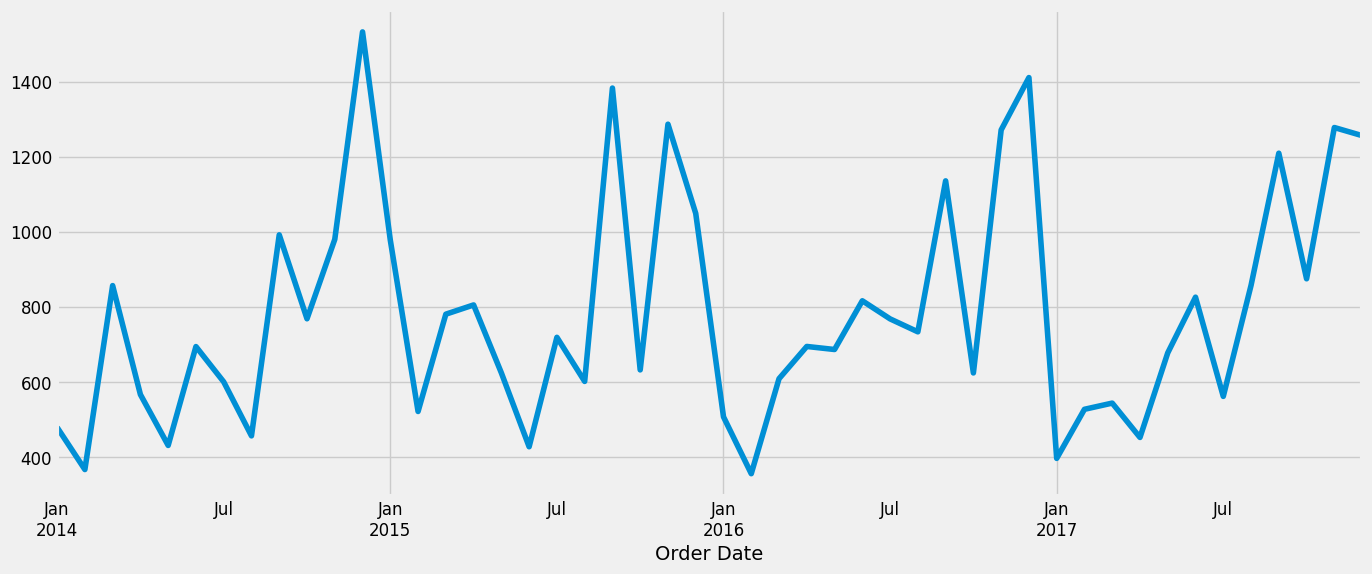

In [77]:
y.plot(figsize=(15, 6))
plt.show()

#### Observed, Trend, Seasonal, and Residual Components 


Time Series Decomposition of Sales: This is a method to break down the sales data over time into different parts to understand it better.

Original Series: This is the actual sales data as it was recorded.

Trend: This shows the general direction in which sales are moving over a long period, like an overall increase or decrease.

Seasonality: This captures regular patterns or cycles in sales data that repeat at specific times, like higher sales in December each year.

Residuals: These are the random fluctuations in sales data that can't be explained by the trend or seasonality, often considered as "noise" or irregular variations.

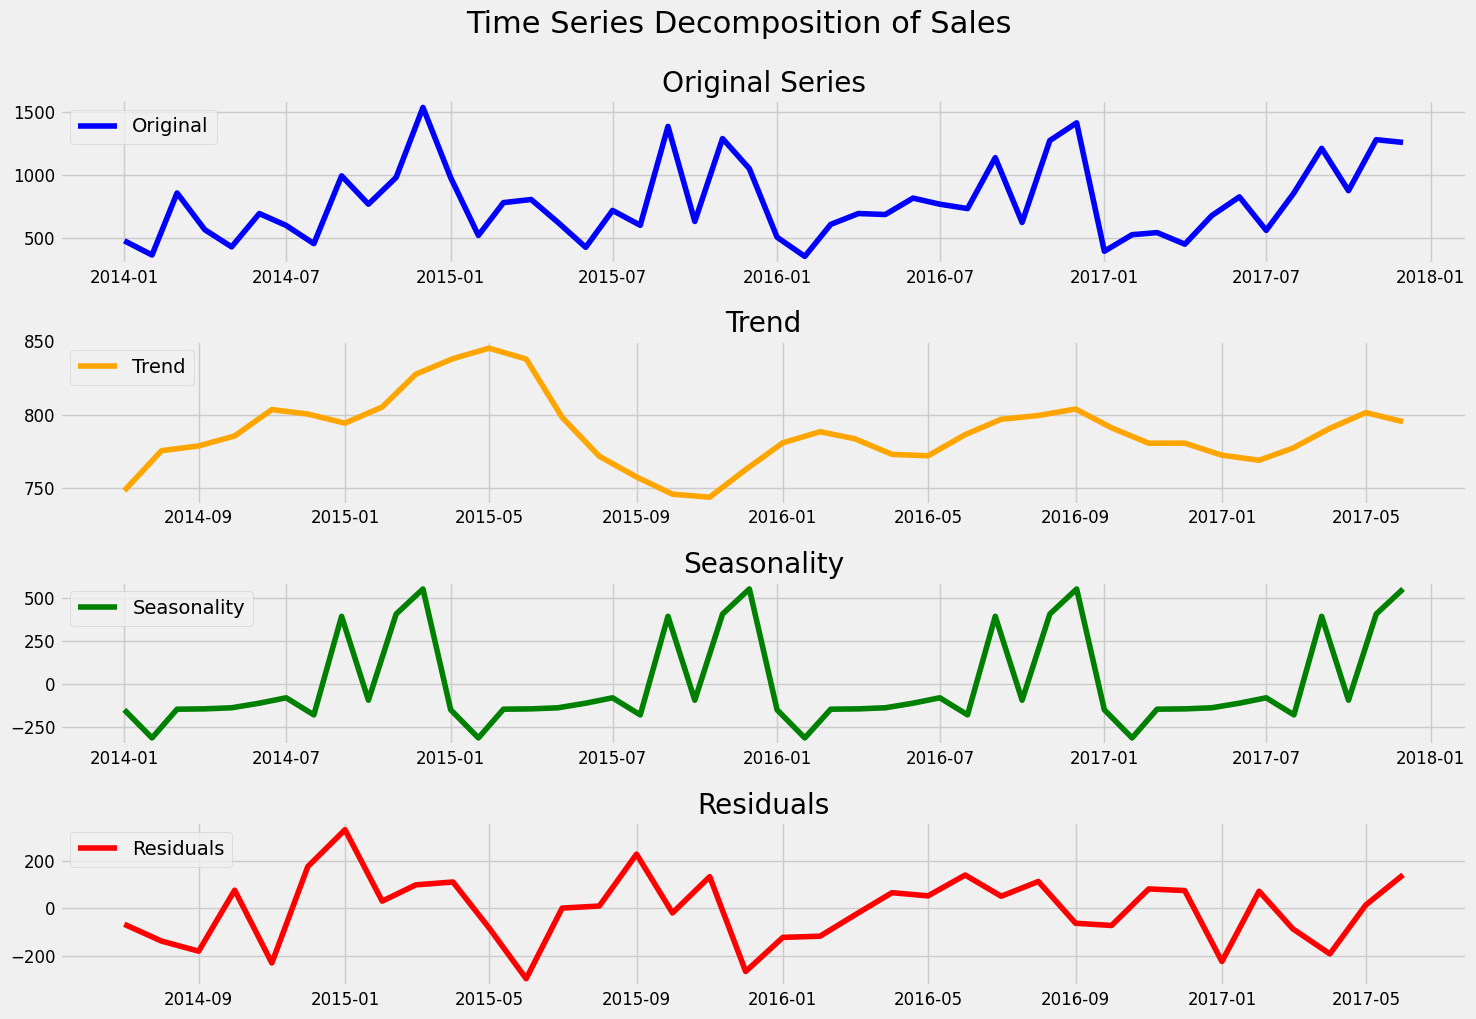

In [78]:
observations = y
decomposition = sm.tsa.seasonal_decompose(observations, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15, 10))
plt.suptitle('Time Series Decomposition of Sales', fontsize=22, y=1.02)

# Original Series
plt.subplot(411)
plt.plot(observations, label='Original', color="blue")
plt.legend(loc='upper left')
plt.title('Original Series')

# Trend
plt.subplot(412)
plt.plot(trend, label='Trend', color="orange")
plt.legend(loc='upper left')
plt.title('Trend')

# Seasonality
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color="green")
plt.legend(loc='upper left')
plt.title('Seasonality')

# Residuals
plt.subplot(414)
plt.plot(residual, label='Residuals', color="red")
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()

#### Time Series forecasting with ARIMA

We are going to apply one of the most commonly used method for time-series forecasting, known as ARIMA, which stands for Autoregressive Integrated Moving Average.

Parameter Selection for the ARIMA Time Series Model

In [79]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

#Jährliche Saison
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


p (autoregressive part): This is the number of past values included in the model, indicating how many previous time points are used to predict the current value.

d (differencing part): This indicates how many times the data need to be differenced to become stationary, which helps remove trends and stabilize the data.

q (moving average part): This is the number of previous error terms (differences between actual and predicted values) included in the model.

#### Grid Search for the best ARIMA parameters

In [80]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:769.0817523205915
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1770.6709925828507
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:477.7170130919703
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:302.2702899793624
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:497.2314433418338
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1308.389104048196
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.0047199116341
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:304.2488280303074
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:720.9252270758121
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2726.923131433401
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:466.56074298091517
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:291.62613896732984
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.56431153142387
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2596.382678454022
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:319.9884876946868
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:291.87255765122376
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:677.8947668259312
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1500.1707819435048
ARIM

#### Fitting the ARIMA model

In [81]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415     -2.409      0.016      -1.814      -0.186
ar.S.L12      -0.0036      0.426     -0.008      0.993      -0.838       0.830
ma.S.L12      -0.3011      0.502     -0.599      0.549      -1.286       0.683
sigma2      2.476e+04   1.68e-05   1.48e+09      0.000    2.48e+04    2.48e+04


#### Visualizing the ARIMA Time Series Forecasting Results

In [82]:
print("Length of the time series:", len(y))

Length of the time series: 48


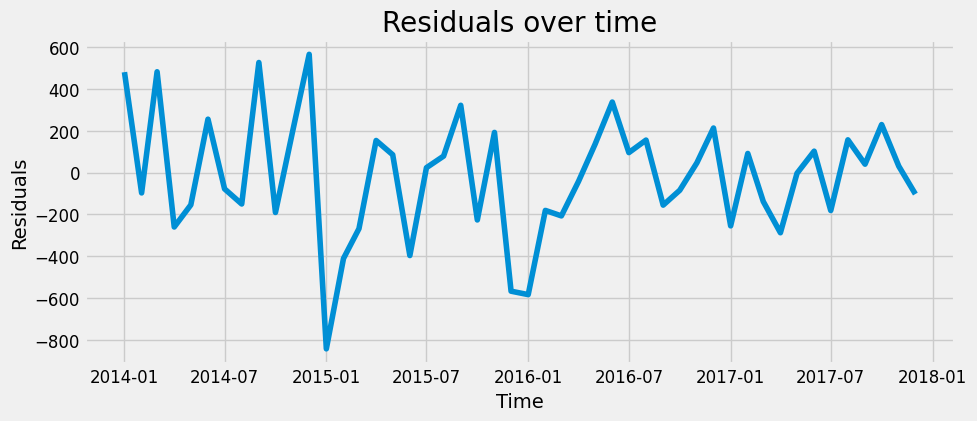

In [83]:
residuals = results.resid
plt.figure(figsize=(10, 4))
plt.plot(residuals)
plt.title('Residuals over time')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

There are clear fluctuations in the residuals, which may indicate seasonal patterns or trends that were not fully captured by the model. These fluctuations appear to be repeated regularly over the years.

Residuals should fluctuate around the zero line with no discernible trends or seasonal patterns if the model describes the data well. However, there are some noticeable outliers and fluctuations in this plot, suggesting that the model may not have captured all systematic patterns in the data.

There are some extreme values, particularly around the turn of 2015, which indicate that the model made major errors in these periods. These outliers could indicate unusual events or errors in the model

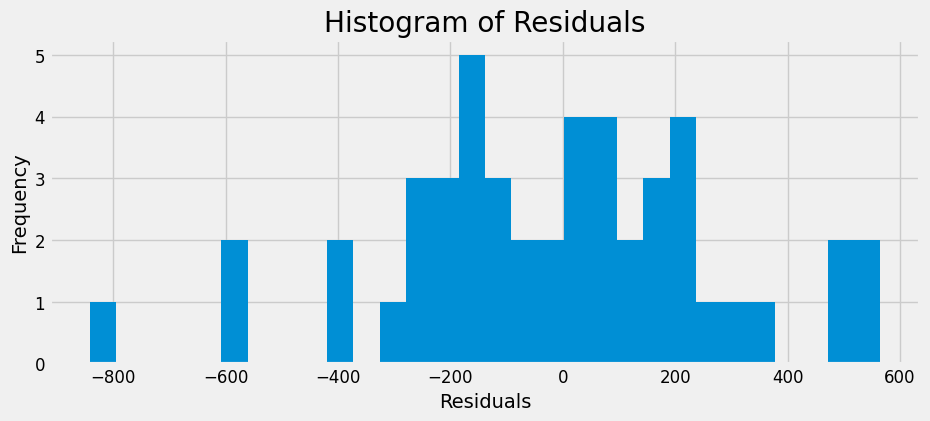

In [84]:
plt.figure(figsize=(10, 4))
plt.hist(residuals, bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

A histogram shows the distribution of the residuals. Ideally, the residuals should follow a normal distribution that forms a bell-shaped curve.
In this histogram, we see that the residuals are not perfectly normally distributed. There are several bars representing different frequencies of the residuals in different areas.

A normally distributed distribution should be symmetrical around the mean value. This histogram shows a certain symmetry around the mean value, but also shows some deviations.

There are some extreme residual values, particularly around -800 and 600, which indicate outliers. These could indicate special events or model errors.

Most of the residuals seem to be concentrated in the range of about -200 to 200, which indicates that the model does not make extremely large errors in most cases.

<Figure size 1000x400 with 0 Axes>

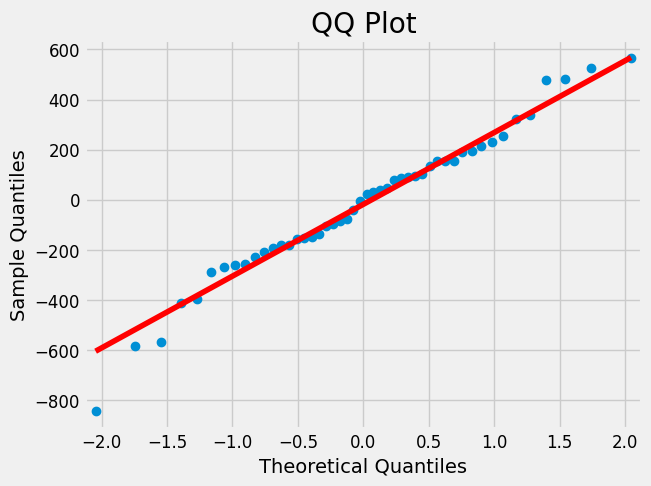

In [85]:
import statsmodels.api as sm
plt.figure(figsize=(10, 4))
sm.qqplot(residuals, line='s')
plt.title('QQ Plot')
plt.show()

Most of the points are relatively close to the red line, which indicates that the residuals roughly follow a normal distribution.

There are some points at the beginning and end (especially for extreme values) that deviate significantly from the line. These outliers indicate that the residuals for the extreme values are not normally distributed.

There is a slight S-curve, which indicates that the distribution of the residuals shows slight deviations from the normal distribution, especially in the extreme ranges.

<Figure size 1000x400 with 0 Axes>

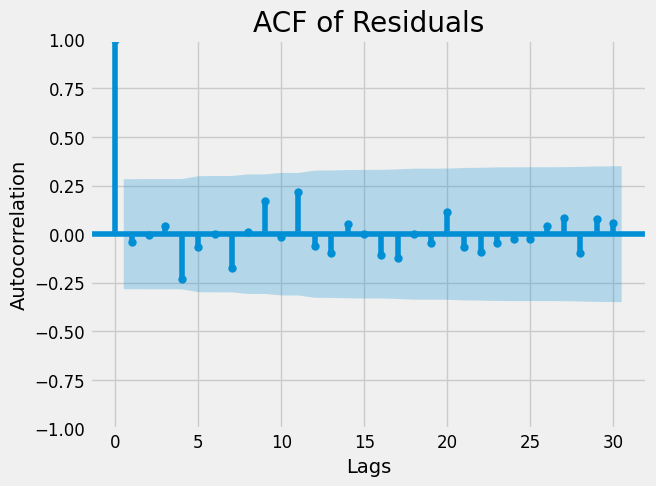

In [86]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(10, 4))
plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

The first bar at lag 0 always has an autocorrelation of 1, as it is the correlation of the residuals with themselves.

Most of the autocorrelation values for the different lags lie within the blue confidence interval, which indicates that these autocorrelations are not significant.

As most of the autocorrelation values lie within the confidence intervals, this indicates that there is no significant autocorrelation in the residuals. This is a good sign as it indicates that the model has captured the time series structure well.

### Validating forecasts

To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017-07-01 to the end of the data.

In [87]:
import plotly.graph_objs as go
import plotly.io as pio

pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

observed_trace = go.Scatter(x=y.index, y=y, mode='lines', name='Observed')

forecast_trace = go.Scatter(x=pred.predicted_mean.index, y=pred.predicted_mean, mode='lines', name='Forecast')

ci_trace = go.Scatter(x=pred_ci.index.tolist() + pred_ci.index.tolist()[::-1],
                      y=pred_ci.iloc[:, 0].tolist() + pred_ci.iloc[:, 1].tolist()[::-1],
                      fill='toself',
                      fillcolor='rgba(0,100,80,0.2)',
                      line=dict(color='rgba(255,255,255,0)'),
                      showlegend=False,
                      name='Confidence Interval')


layout = go.Layout(title='Furniture Sales Forecast',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Furniture Sales'))


fig = go.Figure(data=[observed_trace, forecast_trace, ci_trace], layout=layout)

pio.show(fig)



In [88]:
print(pred_ci)

            lower Sales  upper Sales
Order Date                          
2017-01-01   333.862935   970.302098
2017-02-01   118.540925   754.709534
2017-03-01   365.173654  1000.222240
2017-04-01   423.611681  1057.667939
2017-05-01   364.956365   998.124604
2017-06-01   407.701924  1040.070987
2017-07-01   427.792728  1059.438818
2017-08-01   385.593471  1016.582442
2017-09-01   853.964429  1484.353580
2017-10-01   330.759155   960.598652
2017-11-01   932.297045  1561.631005
2017-12-01  1044.352466  1673.220809


The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year.

In [89]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 25708.97



In statistics, the mean squared error (MSE) of an estimator measures the average of the squares of the errors — that is, the average squared difference between the estimated values and what is estimated. The MSE is a measure of the quality of an estimator—it is always non-negative, and the smaller the MSE, the closer we are to finding the line of best fit.

In [90]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 160.34



Root Mean Square Error (RMSE) tells us that our model was able to forecast the average daily furniture sales in the test set within 160.34 of the real sales. Our furniture daily sales range from around 400 to over 1200. In my opinion, this is a pretty good model so far.

### Producing and visualizing forecasts

In [91]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

observed_trace = go.Scatter(x=y.index, y=y, mode='lines', name='Observed')

forecast_trace = go.Scatter(x=pred_uc.predicted_mean.index, y=pred_uc.predicted_mean, mode='lines', name='Forecast')

ci_trace = go.Scatter(x=pred_ci.index.tolist() + pred_ci.index.tolist()[::-1],
                        y=pred_ci.iloc[:, 0].tolist() + pred_ci.iloc[:, 1].tolist()[::-1],
                        fill='toself',
                        fillcolor='rgba(0,100,80,0.2)',
                        line=dict(color='rgba(255,255,255,0)'),
                        showlegend=False,
                        name='Confidence Interval')

layout = go.Layout(title='Furniture Sales Forecast',
                    xaxis=dict(title='Date'),
                    yaxis=dict(title='Furniture Sales'))

fig = go.Figure(data=[observed_trace, forecast_trace, ci_trace], layout=layout)

pio.show(fig)

The above time series analysis for furniture makes me curious about other categories, and how do they compare with each other over time. Therefore, we are going to compare time series of furniture and office supplier.

### Time Series of Furniture vs. Office Supplies

In [92]:
furniture = df.loc[df['Category'] == 'Furniture']
office = df.loc[df['Category'] == 'Office Supplies']
furniture.shape, office.shape

((2121, 21), (6026, 21))

According to our data, there were way more number of sales from Office Supplies than from Furniture over the years.

### Data Exploration

In [93]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
office.drop(cols, axis=1, inplace=True)

In [94]:
furniture = furniture.sort_values('Order Date')
office = office.sort_values('Order Date')

In [95]:
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
office = office.groupby('Order Date')['Sales'].sum().reset_index()

In [96]:
furniture = furniture.set_index('Order Date')
office = office.set_index('Order Date')

In [97]:
y_furniture = furniture['Sales'].resample('MS').mean()
y_office = office['Sales'].resample('MS').mean()

In [98]:
furniture = pd.DataFrame({'Order Date':y_furniture.index, 'Sales':y_furniture.values})
office = pd.DataFrame({'Order Date': y_office.index, 'Sales': y_office.values})

In [99]:
store = furniture.merge(office, how='inner', on='Order Date')
store.rename(columns={'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


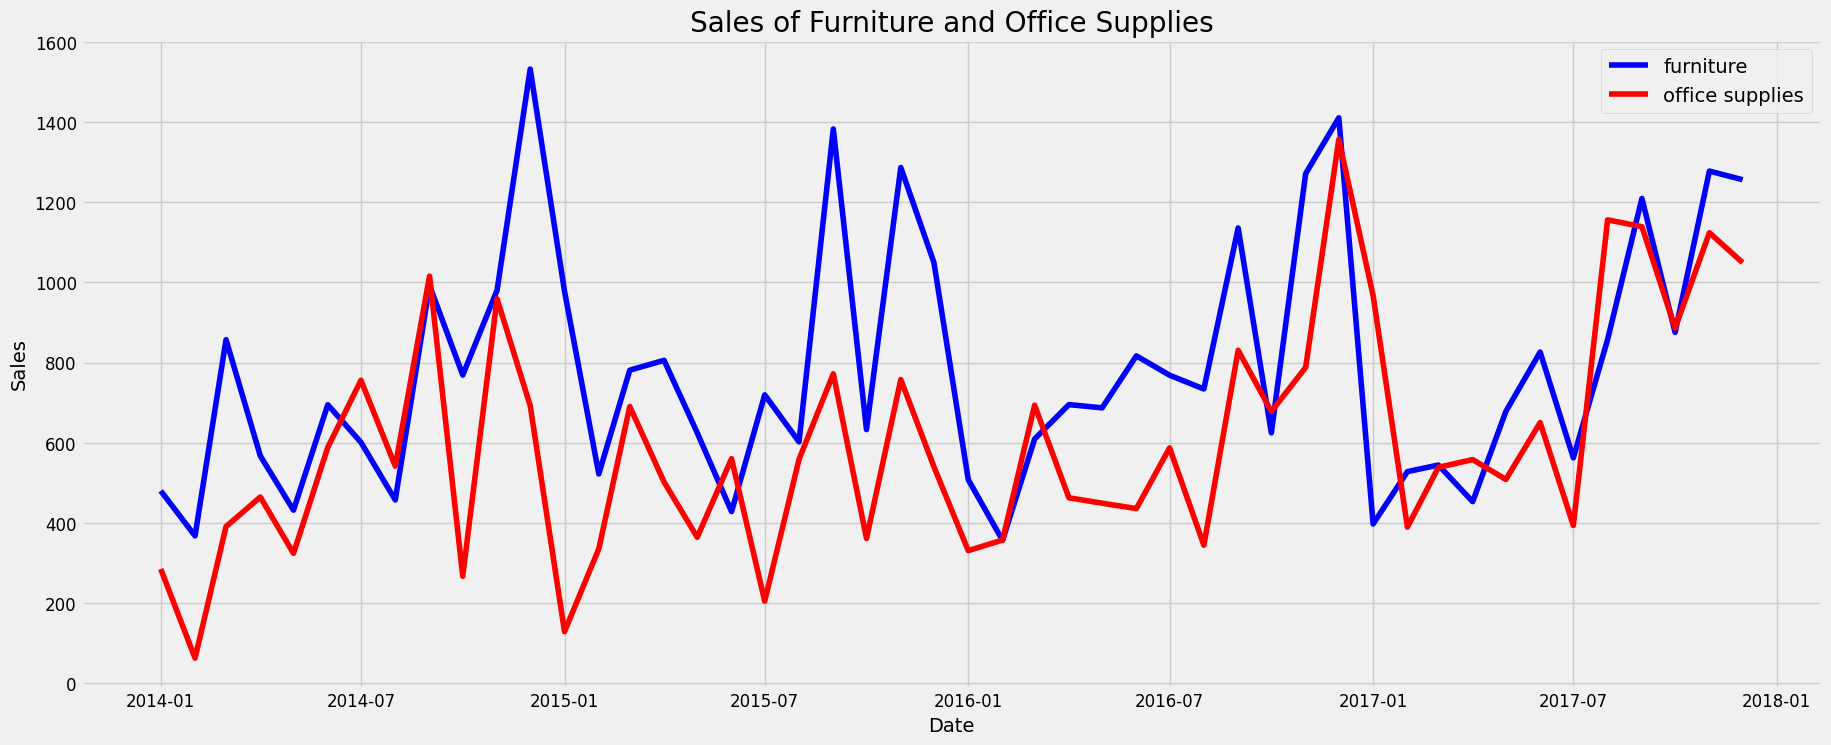

In [100]:
plt.figure(figsize=(20, 8))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'office supplies')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales of Furniture and Office Supplies')
plt.legend();

In [101]:
first_index = np.min(np.where(store['office_sales'] > store['furniture_sales'])[0])
first_date = store.loc[first_index, 'Order Date']

print("Office supplies first time produced higher sales than furniture is {}.".format(first_date.date()))

Office supplies first time produced higher sales than furniture is 2014-07-01.


### Time Series Modeling with Prophet

13:28:25 - cmdstanpy - INFO - Chain [1] start processing
13:28:25 - cmdstanpy - INFO - Chain [1] done processing
13:28:25 - cmdstanpy - INFO - Chain [1] start processing
13:28:25 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

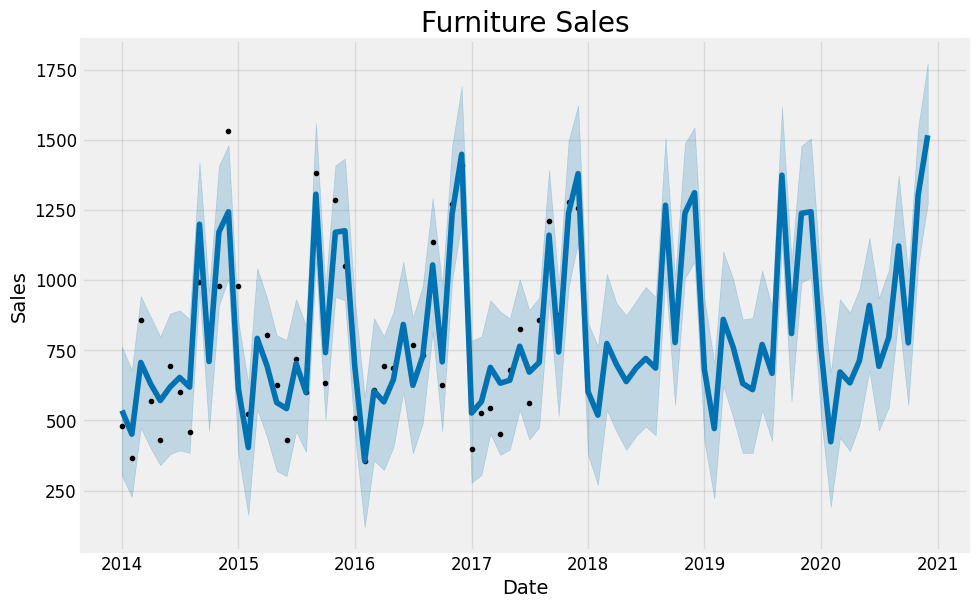

In [102]:
from prophet import Prophet

furniture = furniture.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture)
office = office.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
office_model = Prophet(interval_width=0.95)
office_model.fit(office)

furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
office_forecast = office_model.make_future_dataframe(periods=36, freq='MS')
office_forecast = office_model.predict(office_forecast)

plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Furniture Sales');

<Figure size 1800x600 with 0 Axes>

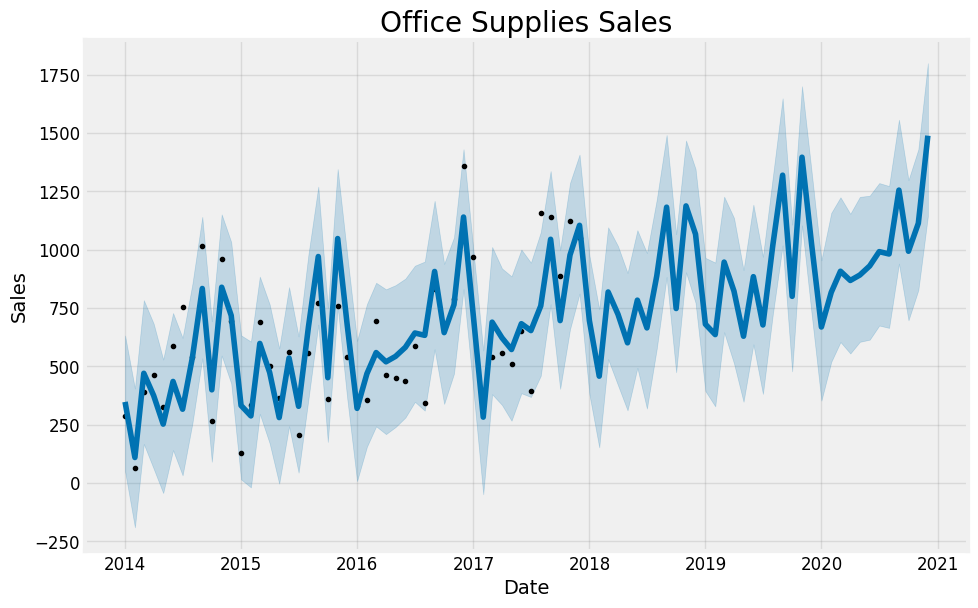

In [103]:
plt.figure(figsize=(18, 6))
office_model.plot(office_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Office Supplies Sales');

In [104]:
office_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [105]:
furniture_forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

### Comparing Forecasts

In [107]:
furniture_names = []
for column in furniture_forecast.columns:
    furniture_names.append('furniture_%s' % column)

office_names = []
for column in office_forecast.columns:
    office_names.append('office_%s' % column)

print(furniture_names)
print(office_names)

['furniture_ds', 'furniture_trend', 'furniture_yhat_lower', 'furniture_yhat_upper', 'furniture_trend_lower', 'furniture_trend_upper', 'furniture_additive_terms', 'furniture_additive_terms_lower', 'furniture_additive_terms_upper', 'furniture_yearly', 'furniture_yearly_lower', 'furniture_yearly_upper', 'furniture_multiplicative_terms', 'furniture_multiplicative_terms_lower', 'furniture_multiplicative_terms_upper', 'furniture_yhat']
['office_ds', 'office_trend', 'office_yhat_lower', 'office_yhat_upper', 'office_trend_lower', 'office_trend_upper', 'office_additive_terms', 'office_additive_terms_lower', 'office_additive_terms_upper', 'office_yearly', 'office_yearly_lower', 'office_yearly_upper', 'office_multiplicative_terms', 'office_multiplicative_terms_lower', 'office_multiplicative_terms_upper', 'office_yhat']


In [108]:
merge_furniture_forecast = furniture_forecast.copy()
merge_office_forecast = office_forecast.copy()

In [112]:
merge_furniture_forecast.columns = furniture_names
merge_office_forecast.columns = office_names

print("Furniture Forecast Columns: ", merge_furniture_forecast.columns)
print("Office Forecast Columns: ", merge_office_forecast.columns)

Furniture Forecast Columns:  Index(['furniture_ds', 'furniture_trend', 'furniture_yhat_lower',
       'furniture_yhat_upper', 'furniture_trend_lower',
       'furniture_trend_upper', 'furniture_additive_terms',
       'furniture_additive_terms_lower', 'furniture_additive_terms_upper',
       'furniture_yearly', 'furniture_yearly_lower', 'furniture_yearly_upper',
       'furniture_multiplicative_terms',
       'furniture_multiplicative_terms_lower',
       'furniture_multiplicative_terms_upper', 'furniture_yhat'],
      dtype='object')
Office Forecast Columns:  Index(['office_ds', 'office_trend', 'office_yhat_lower', 'office_yhat_upper',
       'office_trend_lower', 'office_trend_upper', 'office_additive_terms',
       'office_additive_terms_lower', 'office_additive_terms_upper',
       'office_yearly', 'office_yearly_lower', 'office_yearly_upper',
       'office_multiplicative_terms', 'office_multiplicative_terms_lower',
       'office_multiplicative_terms_upper', 'office_yhat'],
     

In [114]:
forecast = pd.merge(merge_furniture_forecast, merge_office_forecast, how='inner', left_on='furniture_ds', right_on='office_ds')
forecast = forecast.rename(columns={'furniture_ds': 'Date'}).drop('office_ds', axis=1)

In [115]:
print(forecast.head())

        Date  furniture_trend  furniture_yhat_lower  furniture_yhat_upper  \
0 2014-01-01       726.058109            303.018016            762.842789   
1 2014-02-01       727.494421            227.556823            678.414058   
2 2014-03-01       728.791734            473.764381            942.788249   
3 2014-04-01       730.228046            401.249699            869.326487   
4 2014-05-01       731.618025            340.826551            798.870961   

   furniture_trend_lower  furniture_trend_upper  furniture_additive_terms  \
0             726.058109             726.058109               -190.686099   
1             727.494421             727.494421               -276.379157   
2             728.791734             728.791734                -22.388253   
3             730.228046             730.228046               -100.140909   
4             731.618025             731.618025               -160.818882   

   furniture_additive_terms_lower  furniture_additive_terms_upper  \
0    

### Trend and Forecast Visualization

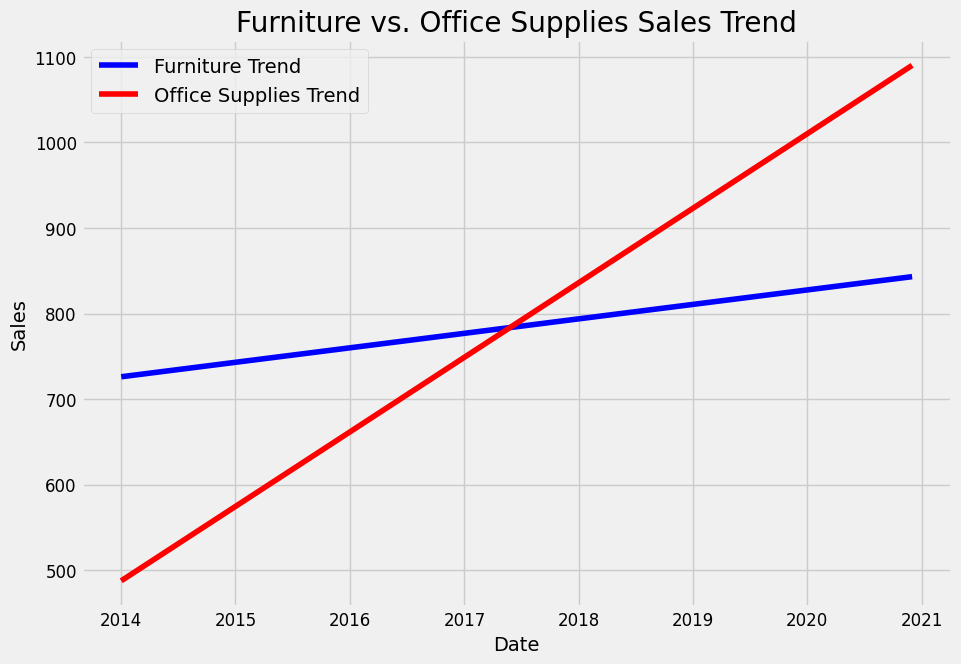

In [120]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['furniture_trend'], 'b-', label='Furniture Trend')
plt.plot(forecast['Date'], forecast['office_trend'], 'r-', label='Office Supplies Trend')

plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Furniture vs. Office Supplies Sales Trend')

plt.legend()

plt.show()
